In [5]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from te_pai import Hamiltonian, resample, TE_PAI,Trotter,Observable


plt.rcParams.update(
    {
        "font.size": 18,
        "axes.titlesize": 20,
        "axes.labelsize": 18,
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.fontsize": 13,
        "figure.titlesize": 20,
        "lines.linewidth": 3,
    }
)

In [6]:
freqs = np.loadtxt("hamil_coef.csv", delimiter=",")
numQs = 14  # Number of qubits
Δ = np.pi / (2**7)  # Delta parameter
T = 2  # Total evolution time
N = 2000
n_snapshot = 20
hamil = Hamiltonian.spin_chain_hamil(numQs, freqs, 100)
obs = Observable(numQs, [(1, [("X", 0)])])

The number of qubit:14
Number of terms in the Hamiltonian:56


In [7]:
trotter = Trotter(hamil, numQs, T, 100, n_snapshot)
x = np.linspace(0, trotter.T, trotter.n_snap + 1)
y1 = trotter.run()
y1_mean = [2 * p - 1 for p in y1]
y1_std = [2 * np.sqrt(p * (1 - p)) / np.sqrt(1000) for p in y1]
trotter = Trotter(hamil, numQs, T, N, n_snapshot)
y2 = trotter.run()
y2 = [2 * p - 1 for p in y2]

In [ ]:
filname = "data/numQ14-T2-delta7-N2000-snap20.pkl"
te_pai = TE_PAI(hamil, numQs, Δ, T, N, n_snapshot)
if os.path.exists(filname):
    res = pickle.load(open(filname, "rb"))
else:
    res = te_pai.run_te_pai(10000, obs)
    pickle.dump(res, open(filname, "wb"))
y3 = [resample(data) for data in res]
y3_mean, y3_std = zip(*[(np.mean(y), np.std(y)) for y in y3], strict=False)

/Users/kiumi/Library/Mobile Documents/com~apple~CloudDocs/Projects/te_pai/te_pai/hamil.py:39: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(fn, 0, T, limit=100)[0]


TE-PAI done


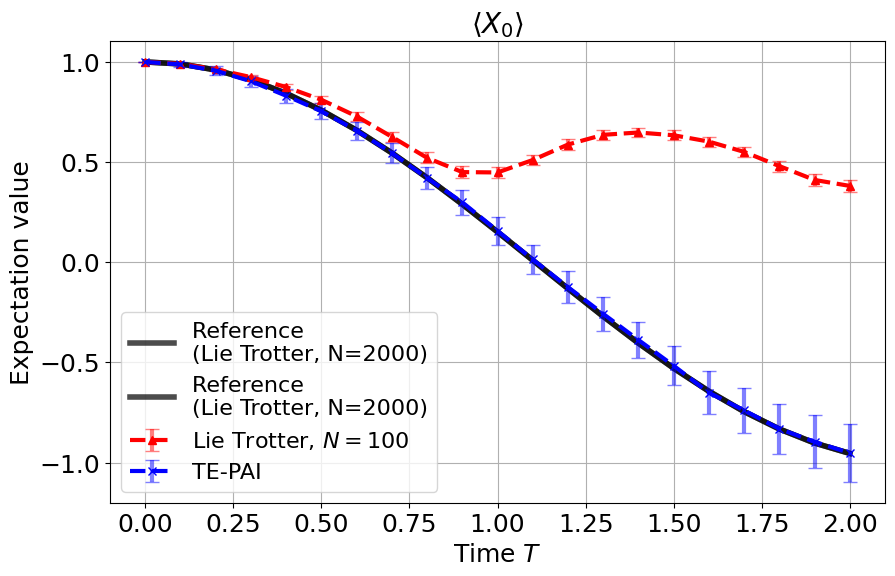

In [24]:
plt.figure(figsize=(10, 6))
_, caps, bars = plt.errorbar(
    x,
    y1_mean,
    yerr=y1_std,
    fmt="r--^",
    label="Lie Trotter, $N=100$",
    capsize=5,
)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
plt.plot(
    x, y2, "k-", alpha=0.7, label="Reference \n(Lie Trotter, N=2000)", linewidth=4
)
plt.plot(
    x, y2, "k-", alpha=0.7, label="Reference \n(Lie Trotter, N=2000)", linewidth=4
)
_, caps, bars = plt.errorbar(
    x, y3_mean, yerr=y3_std, fmt="b--x", label="TE-PAI", capsize=5
)
[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]
plt.title("$\\langle X_0 \\rangle$")
plt.xlabel("Time $T$")
plt.ylabel("Expectation value")
plt.legend(fontsize=16)
plt.grid(True)